In [1]:
#import necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("files_for_lab/marketing_customer_analysis.csv")
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
df_columns = []
for col in df.columns:
     df_columns.append(col.strip())        
df.columns = df_columns

In [5]:
df_num = df.select_dtypes("number")
df_cat = df.select_dtypes("object")
df_cat = df_cat.drop(["Customer", "Effective To Date"], axis = 1)

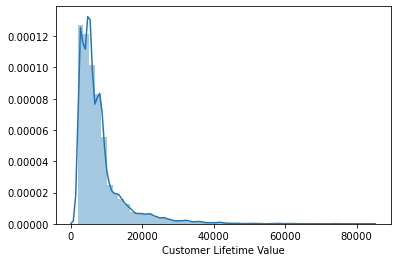

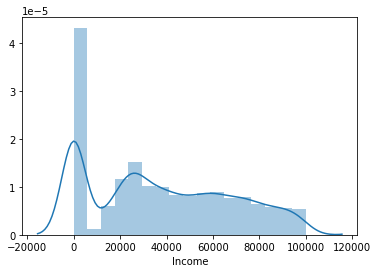

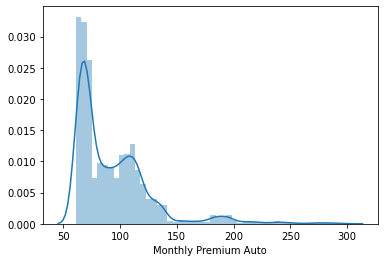

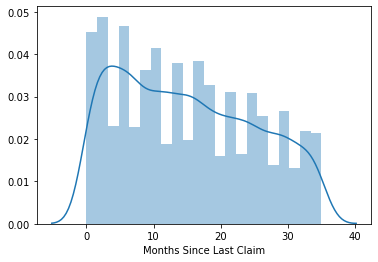

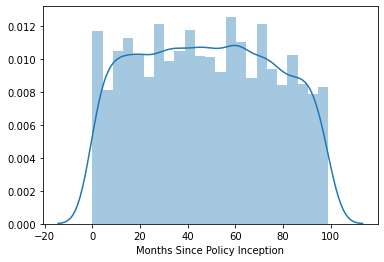

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


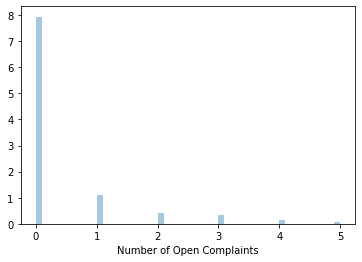

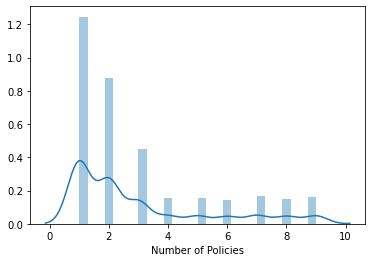

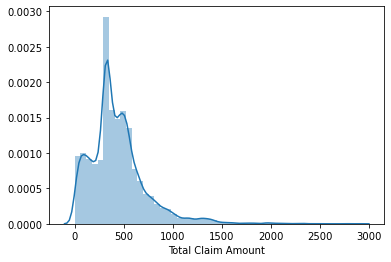

In [6]:
#checking the data in each column
#checking numbers

for col in df_num.columns:
    sns.distplot(df[col])
    plt.show()
    

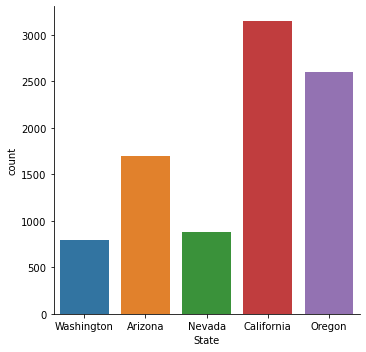

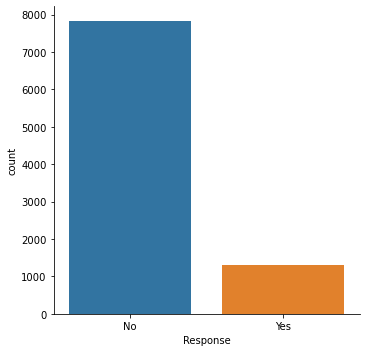

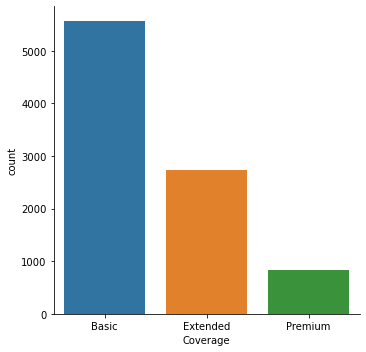

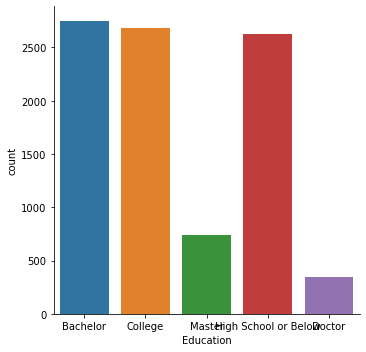

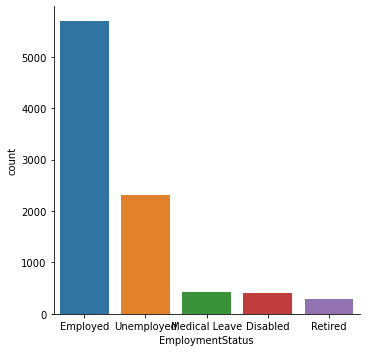

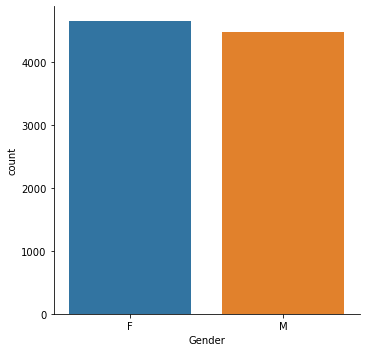

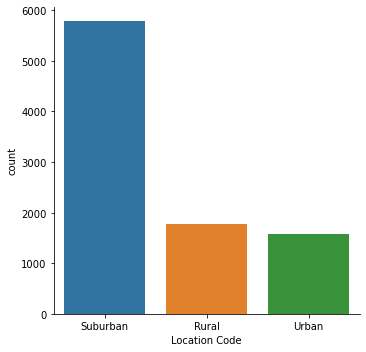

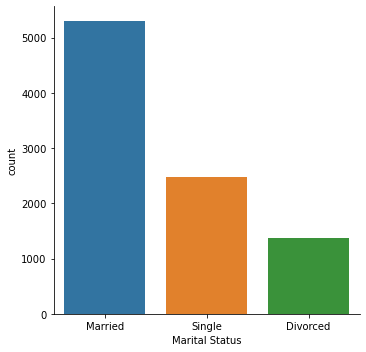

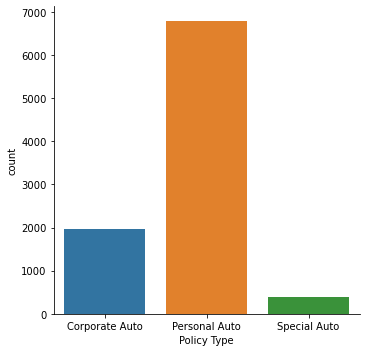

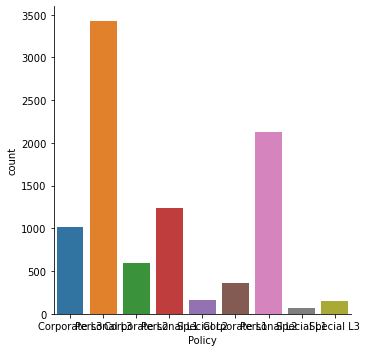

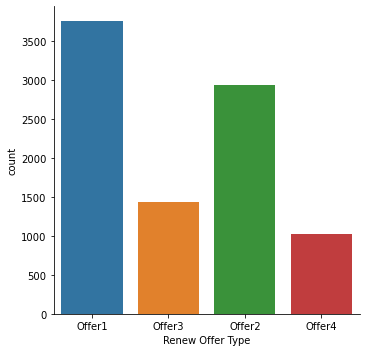

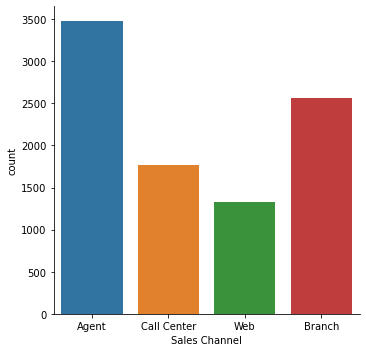

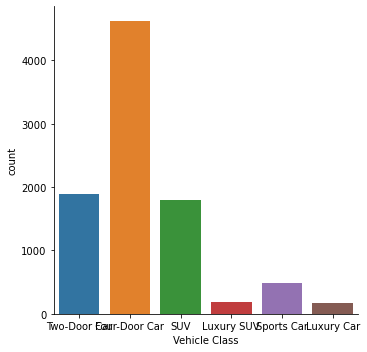

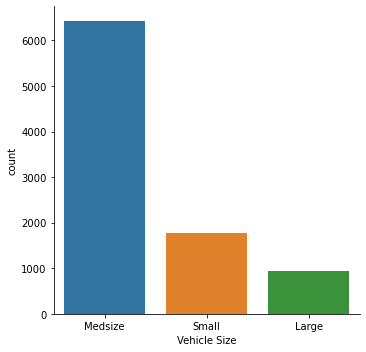

In [7]:
#checking categorical
for col in df_cat.columns:
    sns.catplot(x = col, kind = "count", data = df_cat)
    plt.show()

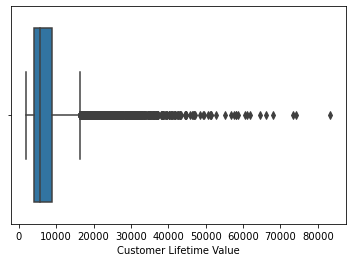

IQR for Customer Lifetime Value is: 4967.915247000001


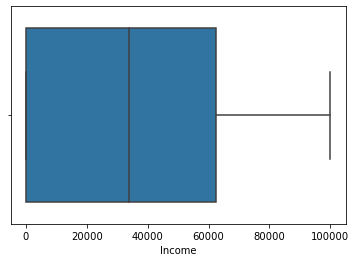

IQR for Income is: 62320.0


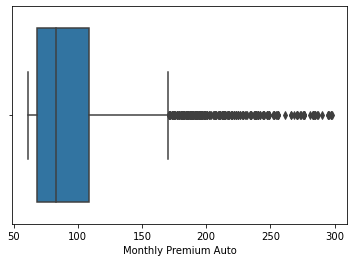

IQR for Monthly Premium Auto is: 41.0


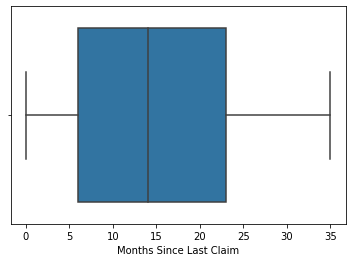

IQR for Months Since Last Claim is: 17.0


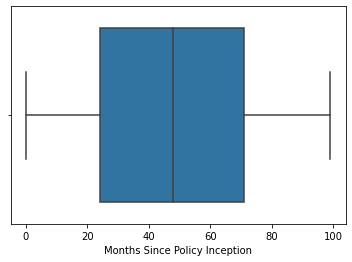

IQR for Months Since Policy Inception is: 47.0


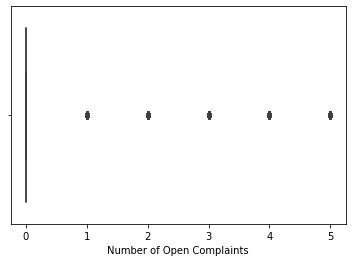

IQR for Number of Open Complaints is: 0.0


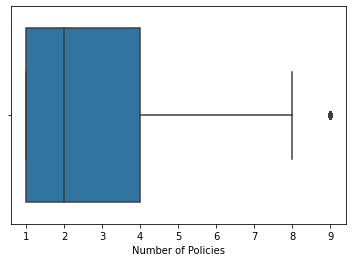

IQR for Number of Policies is: 3.0


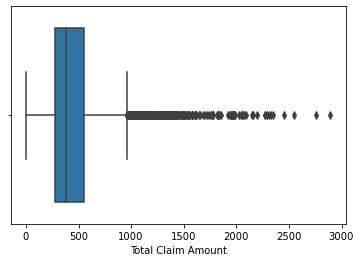

IQR for Total Claim Amount is: 275.2565942500001


In [8]:
# checking for outliers  
for col in df_num.columns:
    sns.boxplot(x = df_num[col])
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQ  = Q3-Q1
    
    plt.show()
    print("IQR for " + str(col) + " is: " + str(IQ))


In [9]:
Q1 = df_num["Monthly Premium Auto"].quantile(0.25)
Q3 = df_num["Monthly Premium Auto"].quantile(0.75)
IQR  = Q3-Q1
df_num["Monthly Premium Auto"]  =  df_num.loc[(df_num["Monthly Premium Auto"] < (IQR + 1.5*Q3)) & (df_num["Monthly Premium Auto"] > (IQR - 1.5*Q1))]


Q1 = df_num["Total Claim Amount"].quantile(0.25)
Q3 = df_num["Total Claim Amount"].quantile(0.75)
IQR  = Q3-Q1
df_num["Total Claim Amount"]  =  df_num.loc[(df_num["Total Claim Amount"] < (IQR + 1.5*Q3)) & (df_num["Total Claim Amount"] > (IQR - 1.5*Q1))]


Q1 = df_num["Customer Lifetime Value"].quantile(0.25)
Q3 = df_num["Customer Lifetime Value"].quantile(0.75)
IQR  = Q3-Q1
df_num["Customer Lifetime Value"]  =  df_num.loc[(df_num["Customer Lifetime Value"] < (IQR + 1.5*Q3)) & (df_num["Customer Lifetime Value"] > (IQR - 1.5*Q1))]

df_num.head()


<ipython-input-9-52fa92a0af9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Monthly Premium Auto"]  =  df_num.loc[(df_num["Monthly Premium Auto"] < (IQR + 1.5*Q3)) & (df_num["Monthly Premium Auto"] > (IQR - 1.5*Q1))]
<ipython-input-9-52fa92a0af9c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Total Claim Amount"]  =  df_num.loc[(df_num["Total Claim Amount"] < (IQR + 1.5*Q3)) & (df_num["Total Claim Amount"] > (IQR - 1.5*Q1))]
<ipython-input-9-52fa92a0af9c>:16: SettingWithCopyWarning: 

Customer Lifetime Value  Income  Monthly Premium Auto  \
0              2763.519279   56274           2763.519279   
1              6979.535903       0           6979.535903   
2             12887.431650   48767          12887.431650   
3              7645.861827       0           7645.861827   
4              2813.692575   43836           2813.692575   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number of Open Complaints  Number of Policies  Total Claim Amount  
0                          0                   1         2763.519279  
1                          0                   8                 NaN  
2                          0                   2        12887.431650  
3                          0                   7         7645.861827  
4                          0                   1         2813.692575

In [10]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        8465 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           8980 non-null   float64
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
 7   Total Claim Amount             8831 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 570.9 KB


In [11]:
df_num = df_num.dropna()

Variable:  Customer Lifetime Value
Skewness =  0.7114536178666624


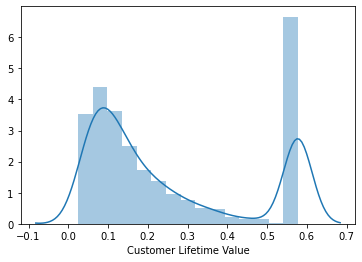

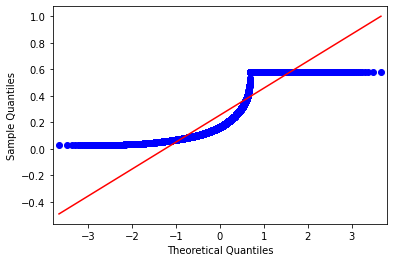

Variable:  Income
Skewness =  -1.1075260191168135


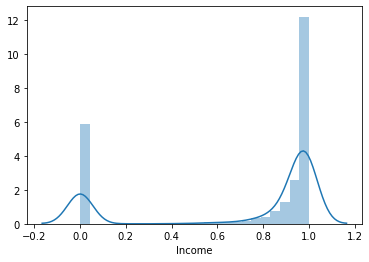

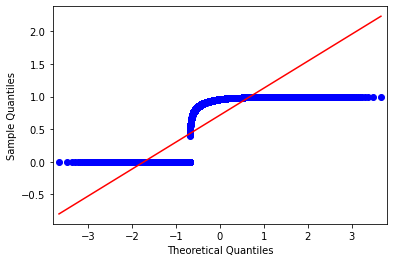

Variable:  Monthly Premium Auto
Skewness =  0.7114536178666624


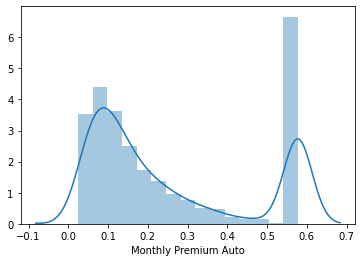

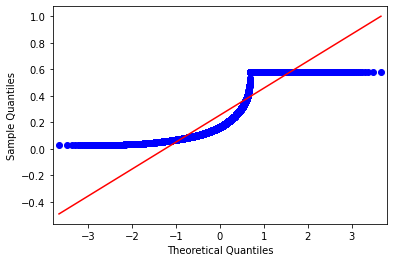

Variable:  Months Since Last Claim
Skewness =  3.2647909121023737


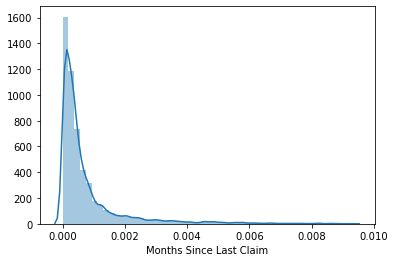

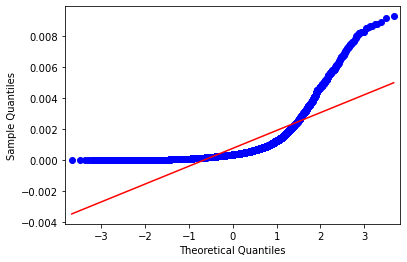

Variable:  Months Since Policy Inception
Skewness =  3.1276417209114005


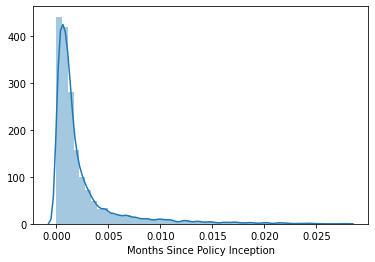

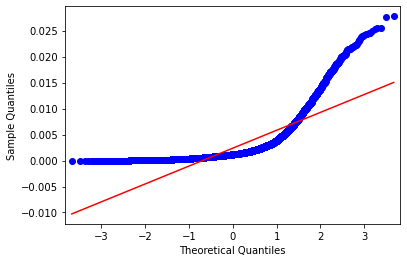

Variable:  Number of Open Complaints
Skewness =  7.875423762106224


D:\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


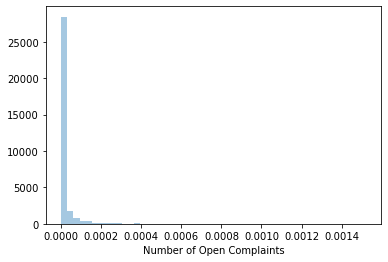

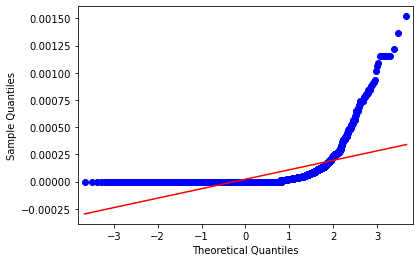

Variable:  Number of Policies
Skewness =  2.82809729941247


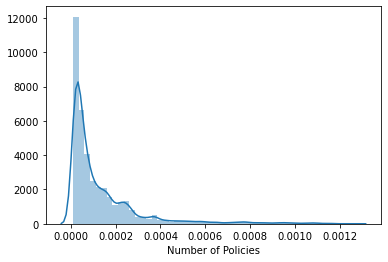

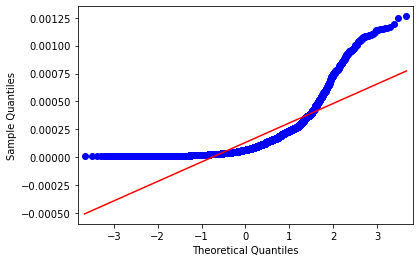

Variable:  Total Claim Amount
Skewness =  0.7114536178666624


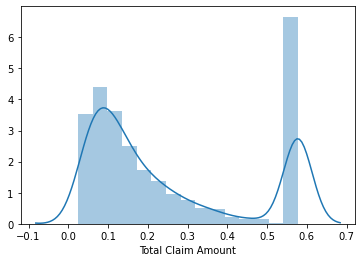

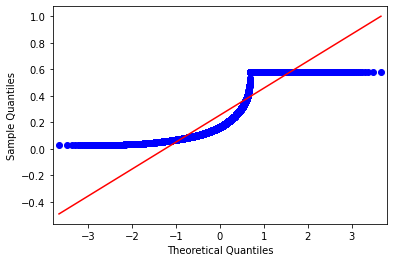

In [12]:
#Normalizing data
from sklearn.preprocessing import Normalizer

tfm = Normalizer().fit(df_num)
df_num_normaled = pd.DataFrame(tfm.transform(df_num))
df_num_normaled.columns = df_num.columns

    
#check for normality
from scipy.stats import skew
df_num_skew = df_num.apply(skew)
from scipy.stats import kurtosis
kurtosis(df_num_skew)
from statsmodels.graphics.gofplots import qqplot

for col in df_num.columns:
    print("Variable: ",col)
    print("Skewness = ", df_num_normaled[col].skew() )
    sns.distplot(df_num_normaled[col])
    plt.show()
    qqplot(df_num_normaled[col], line='s')
    plt.show()


In [13]:
#Encoding Categorical data
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(df_cat)
df_cat_1HE = pd.DataFrame(encoder.transform(df_cat).toarray())
df_cat_1HE.head()

0    1    2    3    4    5    6    7    8    9   ...   33   34   35   36  \
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
4  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    37   38   39   40   41   42  
0  0.0  0.0  0.0  1.0  1.0  0.0  
1  0.0  0.0  0.0  0.0  1.0  0.0  
2  0.0  0.0  0.0  1.0  1.0  0.0  
3  0.0  1.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 43 columns]

In [18]:
df_new = pd.concat([df_num, df_cat_1HE], axis = 1)
df_new = df_new.dropna(axis = 0)
df_new.head()


Customer Lifetime Value   Income  Monthly Premium Auto  \
0              2763.519279  56274.0           2763.519279   
2             12887.431650  48767.0          12887.431650   
3              7645.861827      0.0           7645.861827   
4              2813.692575  43836.0           2813.692575   
5              8256.297800  62902.0           8256.297800   

   Months Since Last Claim  Months Since Policy Inception  \
0                     32.0                            5.0   
2                     18.0                           38.0   
3                     18.0                           65.0   
4                     12.0                           44.0   
5                     14.0                           94.0   

   Number of Open Complaints  Number of Policies  Total Claim Amount    0  \
0                        0.0                 1.0         2763.519279  0.0   
2                        0.0                 2.0        12887.431650  0.0   
3                        0.0                 7.0         7645.861827  1.0   
4                        0.0                 1.0         2813.692575  0.0   
5                        0.0                 2.0         8256.297800  0.0   

     1  ...   33   34   35   36   37   38   39   40   41   42  
0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  
2  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  
3  0.0  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
4  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
5  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  

[5 rows x 51 columns]

In [25]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

Y = df_new["Total Claim Amount"]
X = df_new.drop(["Total Claim Amount"], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)
lm.intercept_
lm.coef_
predictions = lm.predict(X_test)

In [27]:
mae = mean_absolute_error(Y_test,predictions)
mse = mean_squared_error(Y_test,predictions)
rmse = (mean_squared_error(Y_test,predictions))**0.5
print("MAE =  " + str(mae))
print("MSE =  " + str(mse))
print("RMAE = " + str(rmse))
print("r2 =  " + str(r2_score(Y_test, predictions)))


MAE =  4.394195160528825e-12
MSE =  2.69210818393787e-23
RMAE = 5.188552961990337e-12
r2 =  1.0


In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

Y = df_new["Total Claim Amount"]
X = df_new.drop(["Total Claim Amount"], axis = 1)
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)
lm.intercept_
lm.coef_
predictions = lm.predict(X)